In [37]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

import chromatix.functional as cx
from chromatix.field import ScalarField
from chromatix.utils import center_crop, center_pad
from chromatix.utils.fft import fft

In [38]:
def show_amplitude_and_phase(amplitude: np.ndarray, phase: np.ndarray):
    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=300)
    ax = axes[0]
    ax.imshow(amplitude, cmap="gray")
    ax.axis("off")
    ax.set_title("amplitude")
    ax = axes[1]
    ax.imshow(phase, cmap="hsv")
    ax.axis("off")
    ax.set_title("phase")

In [41]:
phase = skimage.data.camera().astype("float")
phase = np.expand_dims(phase, axis=(0, -2, -1))
input_shape = phase.shape
print("input shape:", input_shape)
phase = 2 * np.pi * phase / phase.max()
u = np.exp(1j * phase)
x = ScalarField.create(
    u=u, dx=1, spectrum=np.array(0.532), spectral_density=np.array(1.0)
)

input shape: (1, 512, 512, 1, 1)


In [34]:
x.amplitude.shape

(1, 512, 512, 1)

In [12]:
diffuser_phase = 2 * np.pi * np.random.rand(*input_shape)
# diffuser = np.exp(1j * diffuser_phase)
x_new = cx.phase_change(x, diffuser_phase)

In [13]:
x_new.amplitude

Array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999994],
       [1.        , 0.99999994, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99999994, 1.        , ..., 0.99999994, 1.0000001 ,
        1.        ],
       ...,
       [0.99999994, 1.0000001 , 1.0000001 , ..., 1.        , 1.        ,
        0.99999994],
       [1.        , 1.        , 1.        , ..., 0.99999994, 1.        ,
        0.99999994],
       [0.99999994, 1.        , 0.99999994, ..., 1.        , 1.        ,
        0.99999994]], dtype=float32)

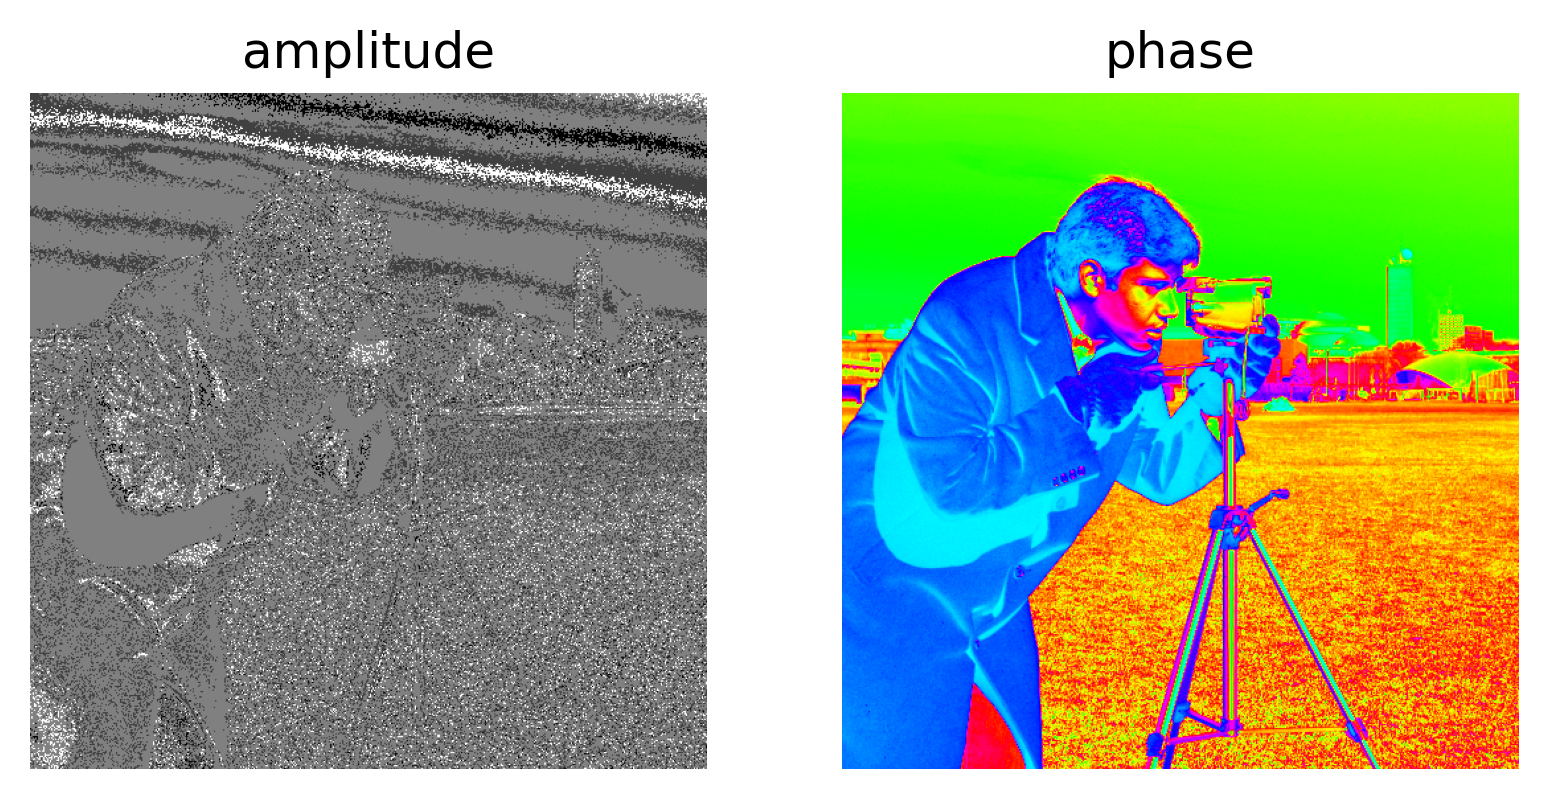

In [20]:
show_amplitude_and_phase(x.amplitude, x.phase)

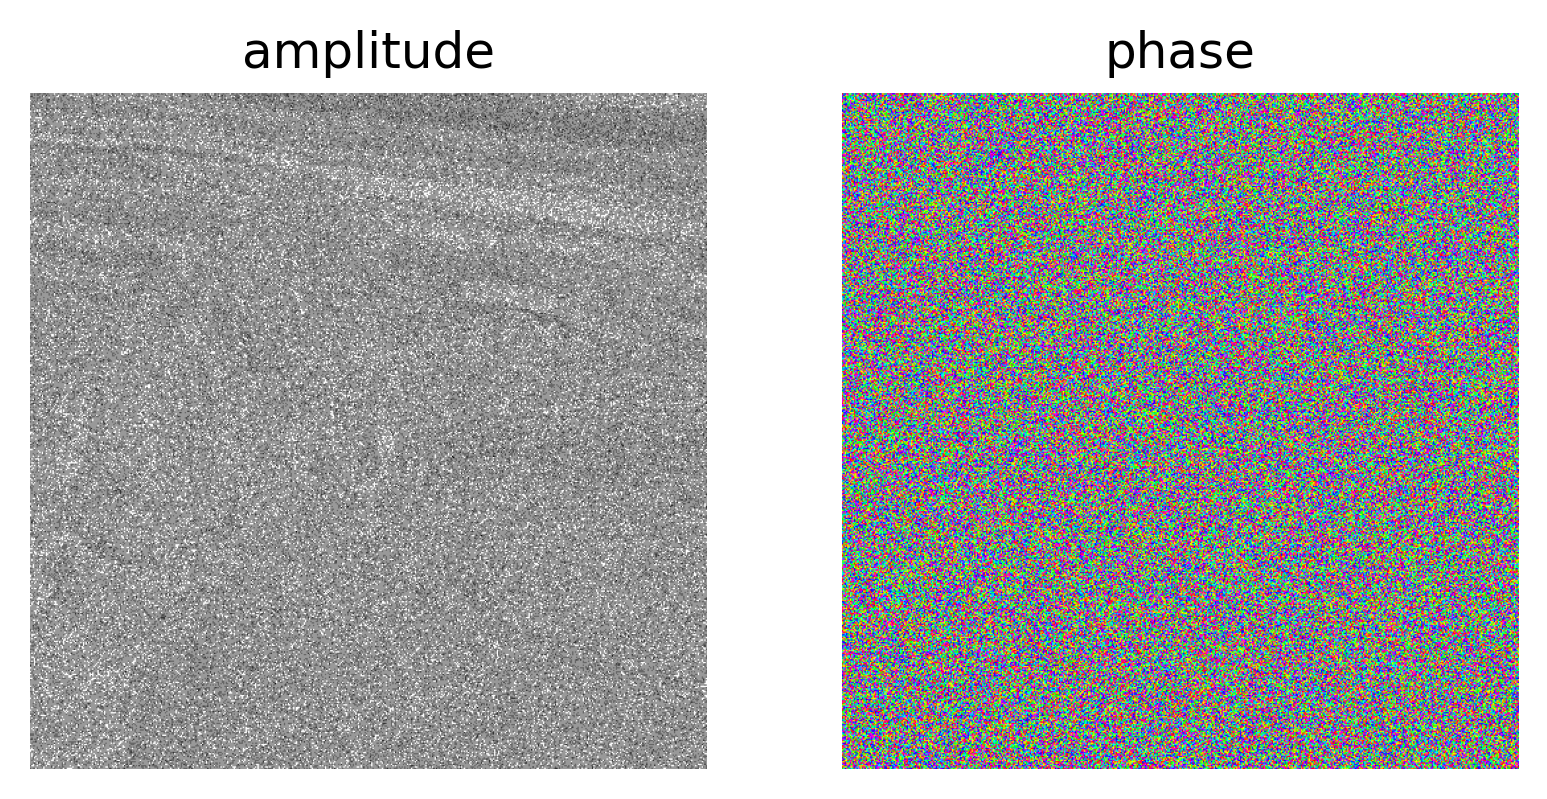

In [15]:
show_amplitude_and_phase(x_new.amplitude, x_new.phase)

In [17]:
x.shape

(512, 512)

In [23]:
u.shape

(512, 512)

In [25]:
center_crop(u, (128, 128)).shape

(256, 256)

In [26]:
center_pad(u, (32, 32)).shape

(576, 576)

In [36]:
fft(u).shape

(1, 512, 512, 1)